In [29]:
from main import GWAnalyzer
import torch
import torchaudio

import matplotlib.pyplot as plt
import shutil
import librosa
import numpy as np

mlp_params = {
    "figure.figsize": [9, 6],
    "axes.labelsize": 22,
    "axes.titlesize": 24,
    "axes.titlepad": 15,
    "figure.titlesize": 24,
    "axes.labelpad": 10,
    "font.size": 16,
    "legend.fontsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "text.usetex": True if shutil.which("latex") else False,
    "font.family": "serif",
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "xtick.top": True,
    "ytick.left": True,
    "ytick.right": True,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.minor.size": 2.5,
    "xtick.major.size": 5,
    "ytick.minor.size": 2.5,
    "ytick.major.size": 5,
    "axes.axisbelow": True,
    "figure.dpi": 200,
}
plt.rcParams.update(mlp_params)

In [3]:
batch_size: int = 384
ifos: int = 2
sample_rate: int = 2048
kernel_length = 1.5
X = torch.randn(batch_size, ifos, int(sample_rate * kernel_length), device="cuda")

In [49]:
detector1 = X[:, 0, :]
wave = detector1[0].cpu().numpy()
wave_torch = detector1
spec = librosa.stft(y=wave, hop_length=5, n_fft=20, window="hann", center=True)
spec_torch = torch.stft(
    wave_torch,
    n_fft=20,
    hop_length=5,
    window=torch.hann_window(20, device="cuda"),
    center=True,
    return_complex=True,
)
amp = np.abs(spec)
db_scaled = librosa.amplitude_to_db(amp)
amp_torch = torch.abs(spec_torch)
db_scaled_torch = torchaudio.functional.amplitude_to_DB(
    amp_torch, multiplier=20.0, amin=1e-10, db_multiplier=0.001
)

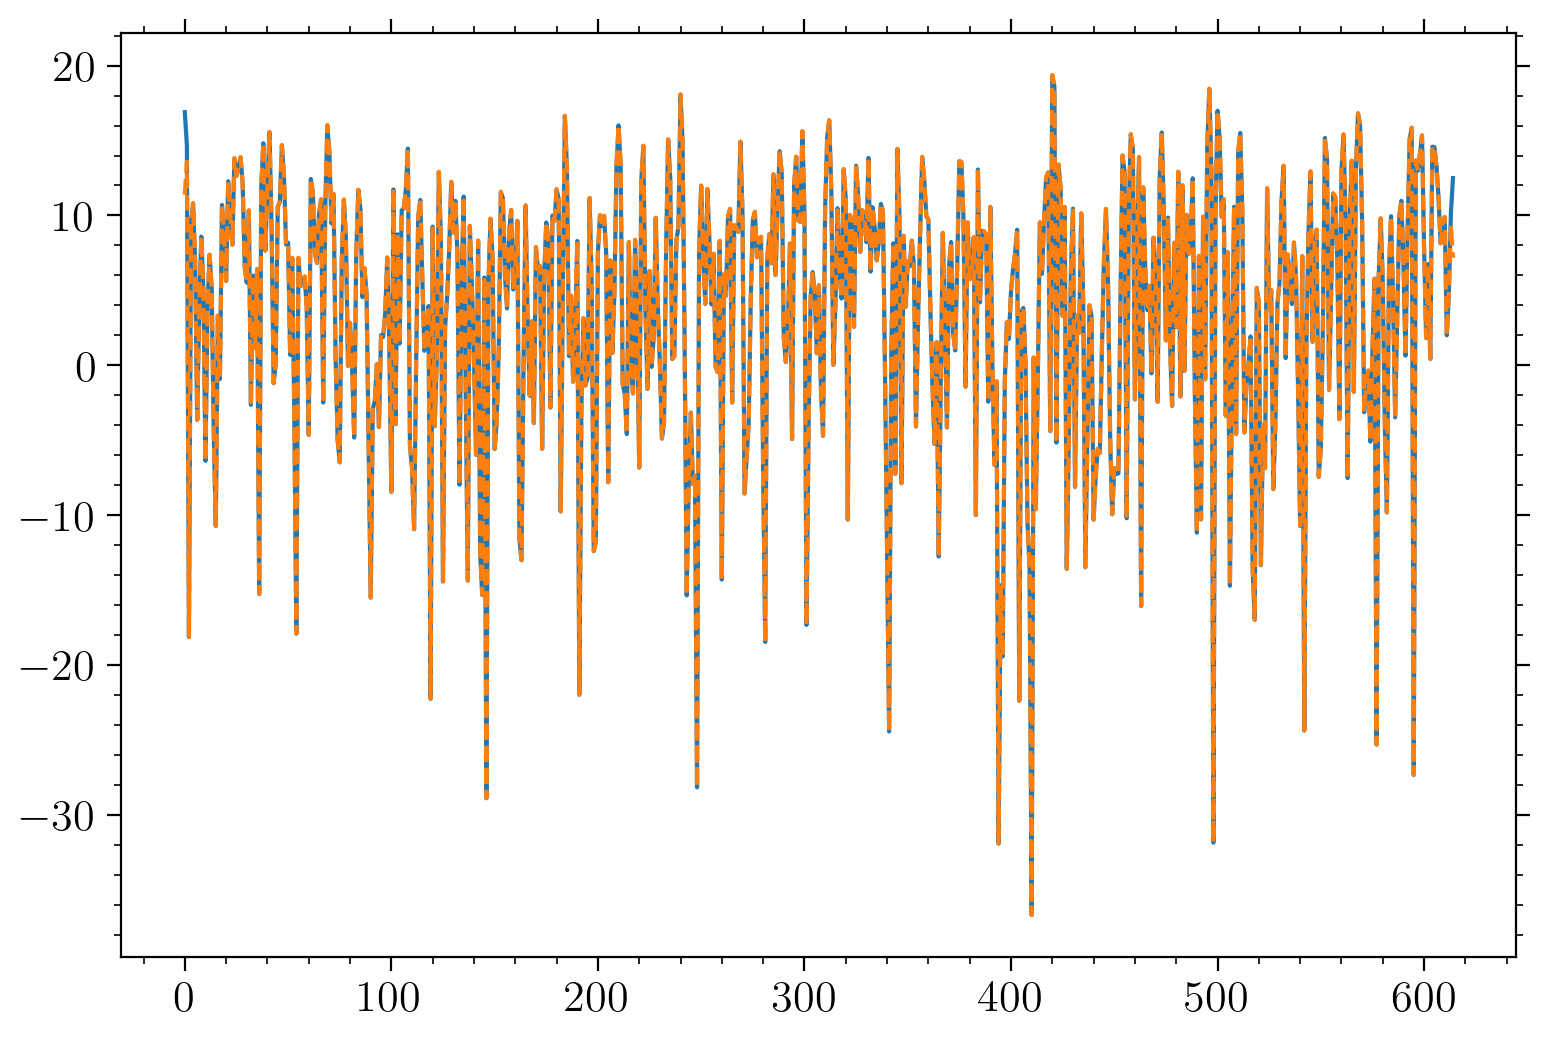

In [ ]:
plt.plot(db_scaled_torch[0][0].cpu().numpy(), label="torch", color="C0")
plt.plot(db_scaled[0], label="librosa", color="C1", linestyle="--")

(-0.1, 0.1)

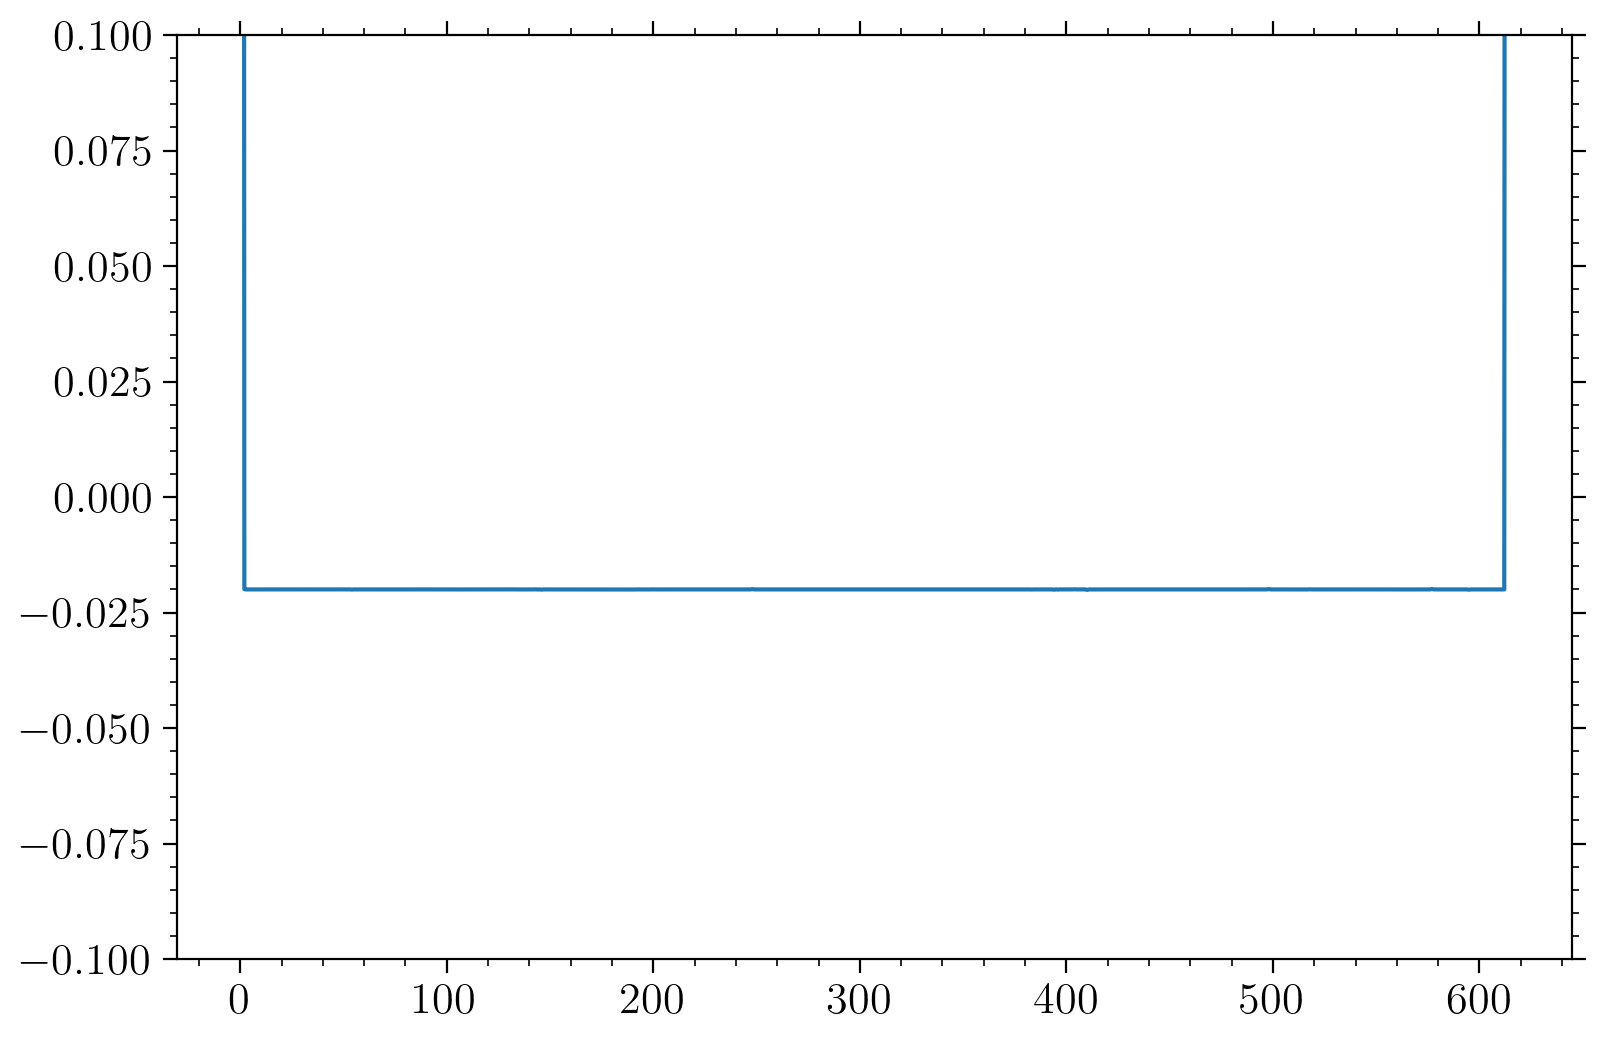

In [55]:
plt.plot(
    db_scaled_torch[0][0].cpu().numpy() - db_scaled[0],
)
plt.ylim(-0.1, 0.1)

In [ ]:
detector1 = X[:, 0, :]
detector2 = X[:, 1, :]
gwana = GWAnalyzer(detector1.cpu().numpy())
gwana.obtain_topological_features(True, True)
features1 = torch.tensor(gwana.topological_features)
gwana = GWAnalyzer(detector2.cpu().numpy())
gwana.obtain_topological_features(True, True)
features2 = torch.tensor(gwana.topological_features)

start processing spectrograms


0it [00:00, ?it/s]

Processing chunk of shape: (384, 1411, 3)
Chunk Elapsed Time: 2.822524309158325
start processing point cloud features


0it [00:00, ?it/s]

Processing chunk of shape: (384, 3072)
Chunk Elapsed Time: 79.83195877075195
Shape of the final features is (384, 36)
start processing spectrograms


0it [00:00, ?it/s]

Processing chunk of shape: (384, 1420, 3)
Chunk Elapsed Time: 3.1893489360809326
start processing point cloud features


0it [00:00, ?it/s]

Processing chunk of shape: (384, 3072)
Chunk Elapsed Time: 75.61568236351013
Shape of the final features is (384, 36)


In [4]:
features = torch.stack([features1, features2], dim=1)
features.shape

torch.Size([384, 2, 36])